## Dimension Reduction

### 주성분 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA # 주성분 분석
from sklearn.preprocessing import StandardScaler # 표준화
data_path = './data/'

In [2]:
heptathlon = pd.read_csv(data_path + "heptathlon.csv", index_col=0)
heptathlon.head() # 7개의 경기 기록

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


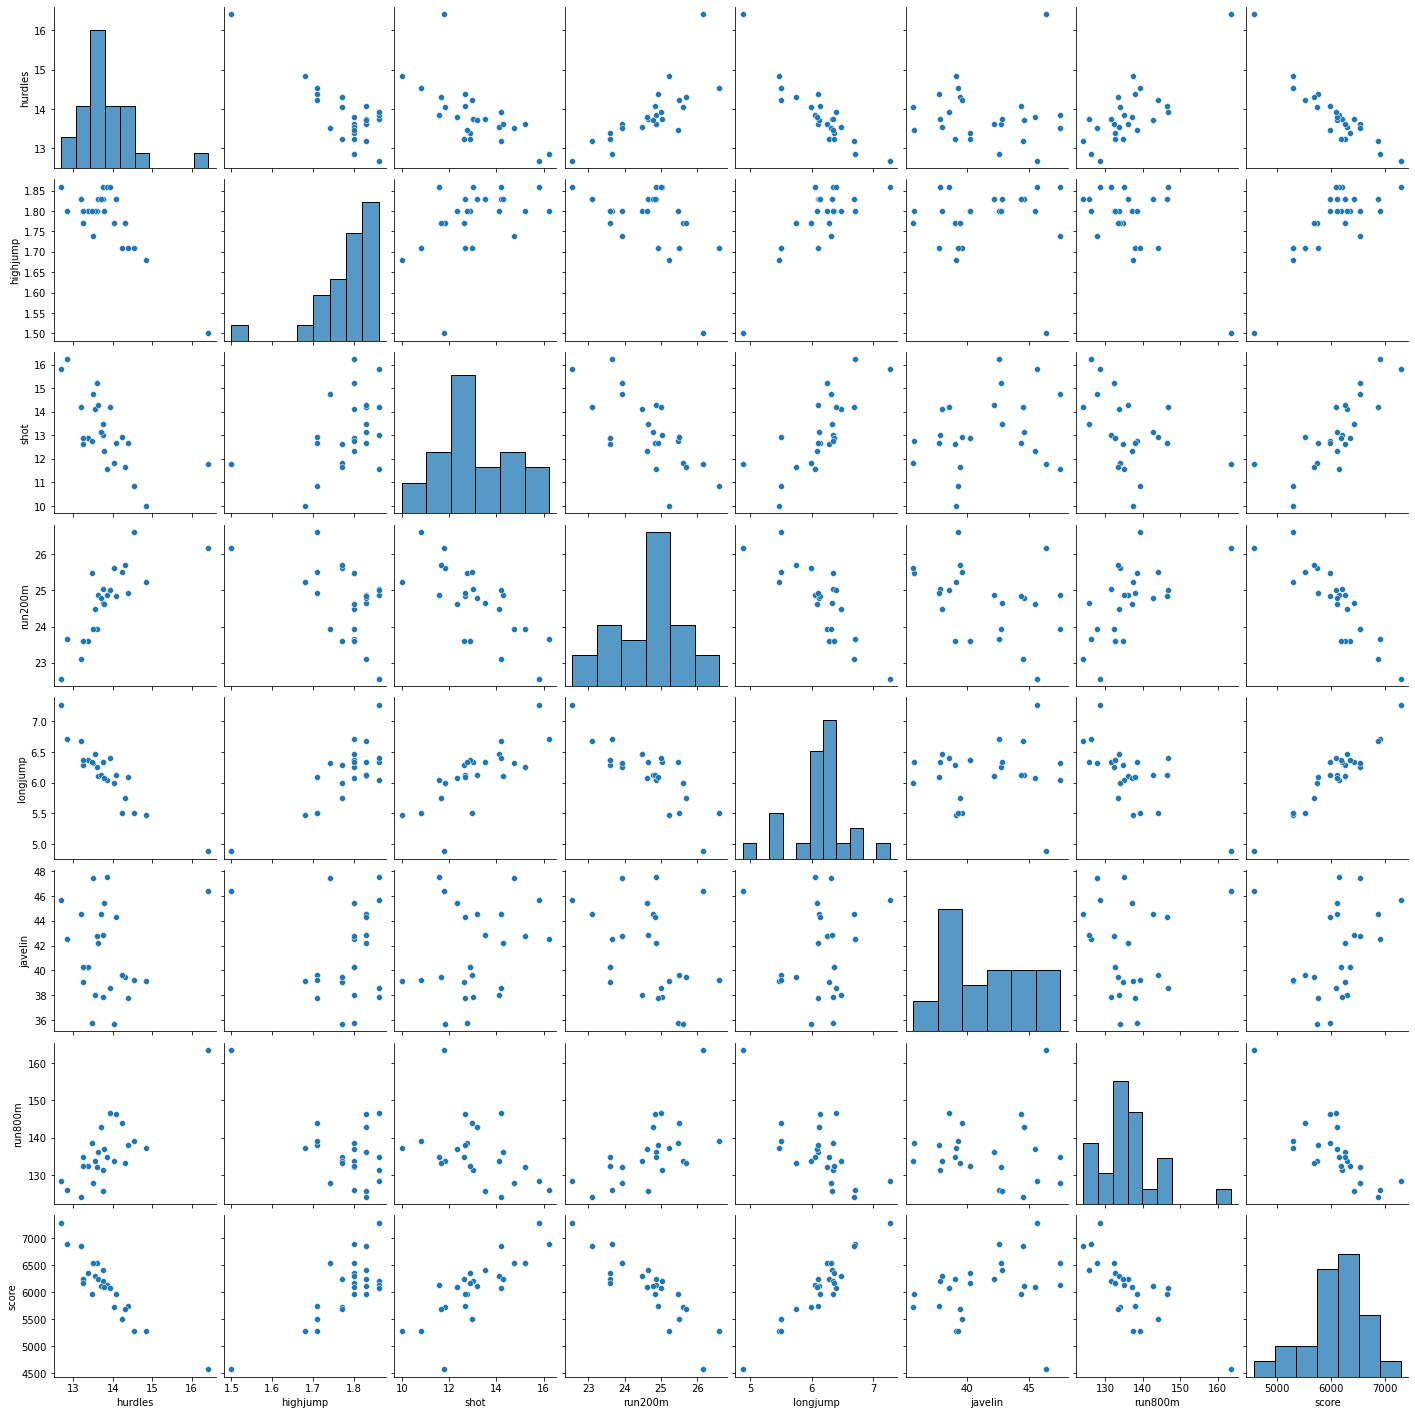

In [3]:
# 몇 변수에서 강한 상관관계를 확인 가능
# 상관관계가 없다면, 저차원으로 축소시킬 여지가 없음 (PCA의 효율이 떨어짐 -> 변환을 통해 선형관계로 만들어주고 PCA 진행)
# 회귀분석에선 다중공선성 여지가 있기 때문에 상관관계가 존재하면 안 좋지만, 주성분분석에선 반대
sns.pairplot(heptathlon)
plt.show()

In [4]:
# 허들, 200m 달리기, 800m 달리기는 score와 반비례이므로, 해석의 용이성을 위해 변환 (클수록 좋은 값이 되도록)
heptathlon.hurdles = max(heptathlon.hurdles) - heptathlon.hurdles
heptathlon.run200m = max(heptathlon.run200m) - heptathlon.run200m
heptathlon.run800m = max(heptathlon.run800m) - heptathlon.run800m

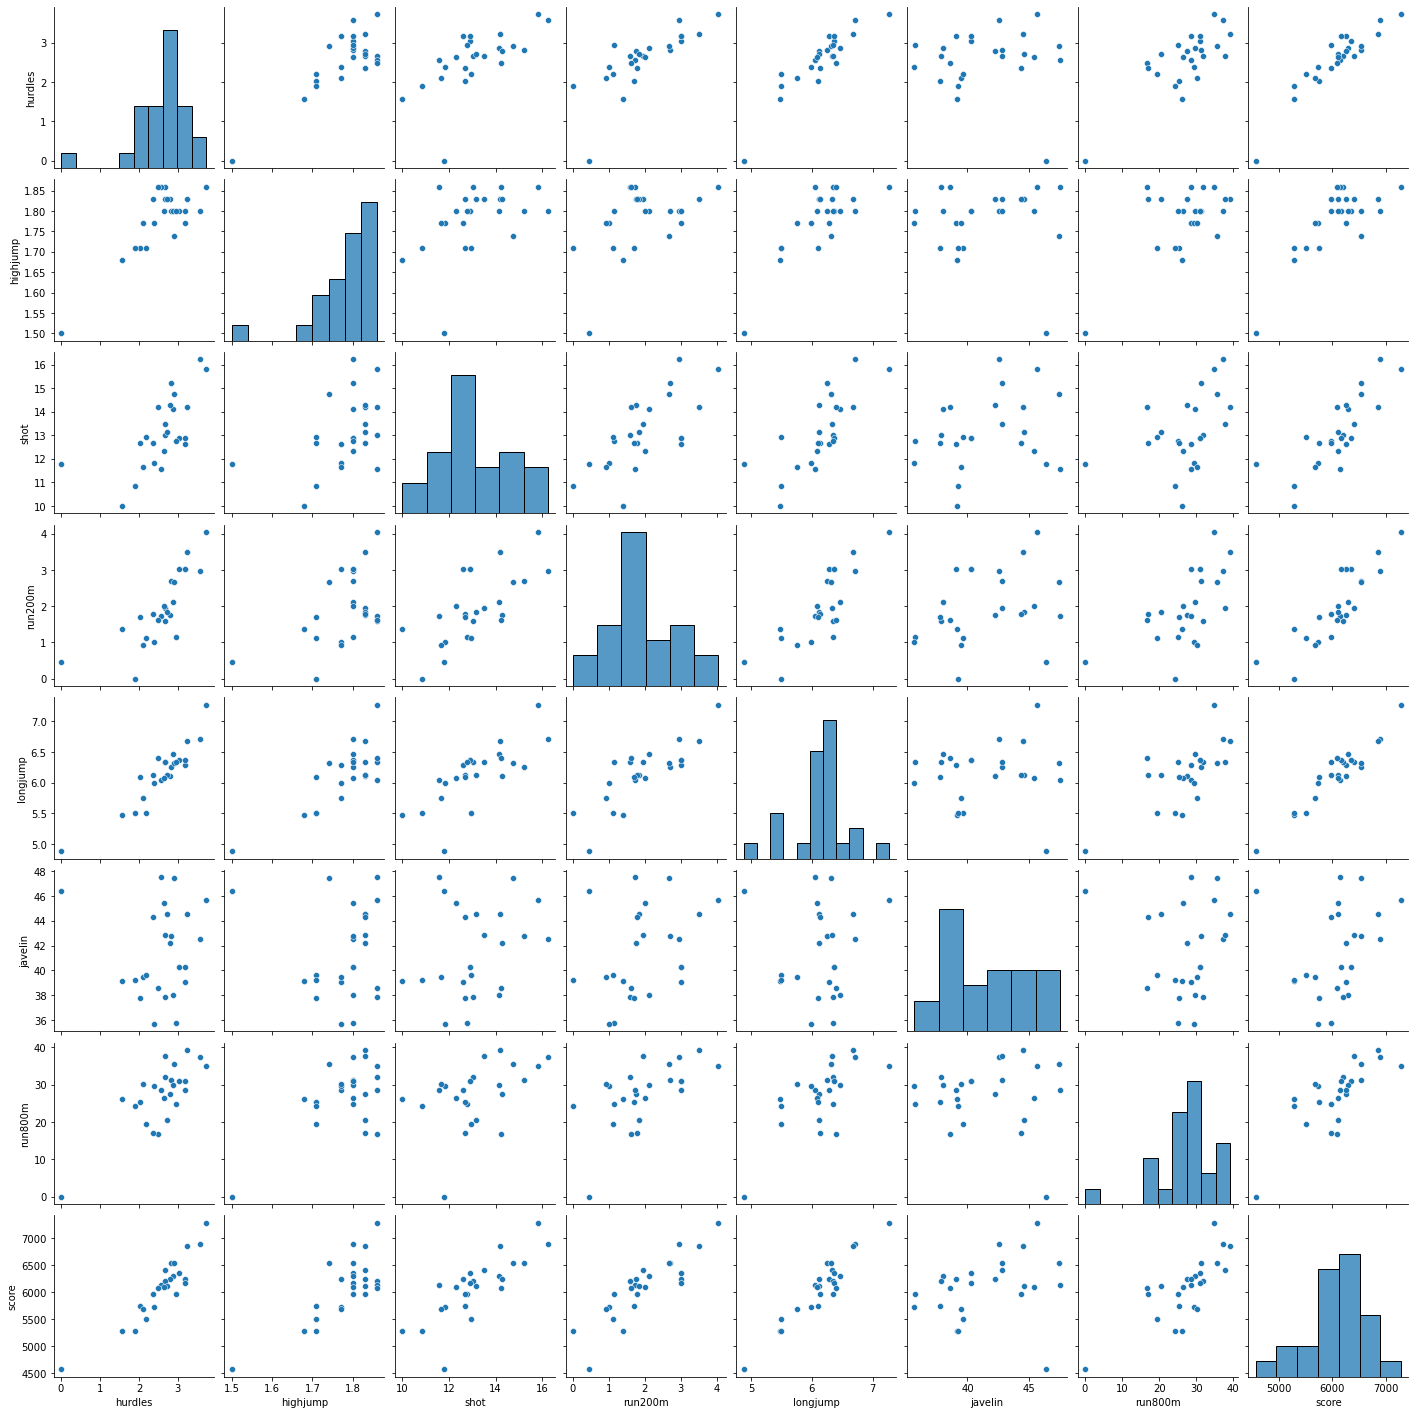

In [5]:
# 관계 중의 비선형성 이외에도 이상치에 대해서도 확인해 봐야함
# 이상치 하나 때문에 상관관계가 왜곡될 수 있음
sns.pairplot(heptathlon)
plt.show()

In [6]:
# 상관관계를 왜곡시키는 데이터를 제거하기 위해 확인
heptathlon[heptathlon.hurdles == min(heptathlon.hurdles)]

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Launa (PNG),0.0,1.5,11.78,0.45,4.88,46.38,0.0,4566


In [7]:
# .index를 통해 row 의 이름이 나옴
# 해당 이름 중 PNG가 포함되어 있는 값만 True가 나옴
# 앞에 ~ 를 통해 True, False를 바꿈 (NOT)
~heptathlon.index.str.contains('PNG')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

- 이상치 제거

In [8]:
# 해당 부분의 데이터를 제거한 뒤 새로운 변수 만듦
heptathlon2 = heptathlon[~heptathlon.index.str.contains('PNG')].copy()

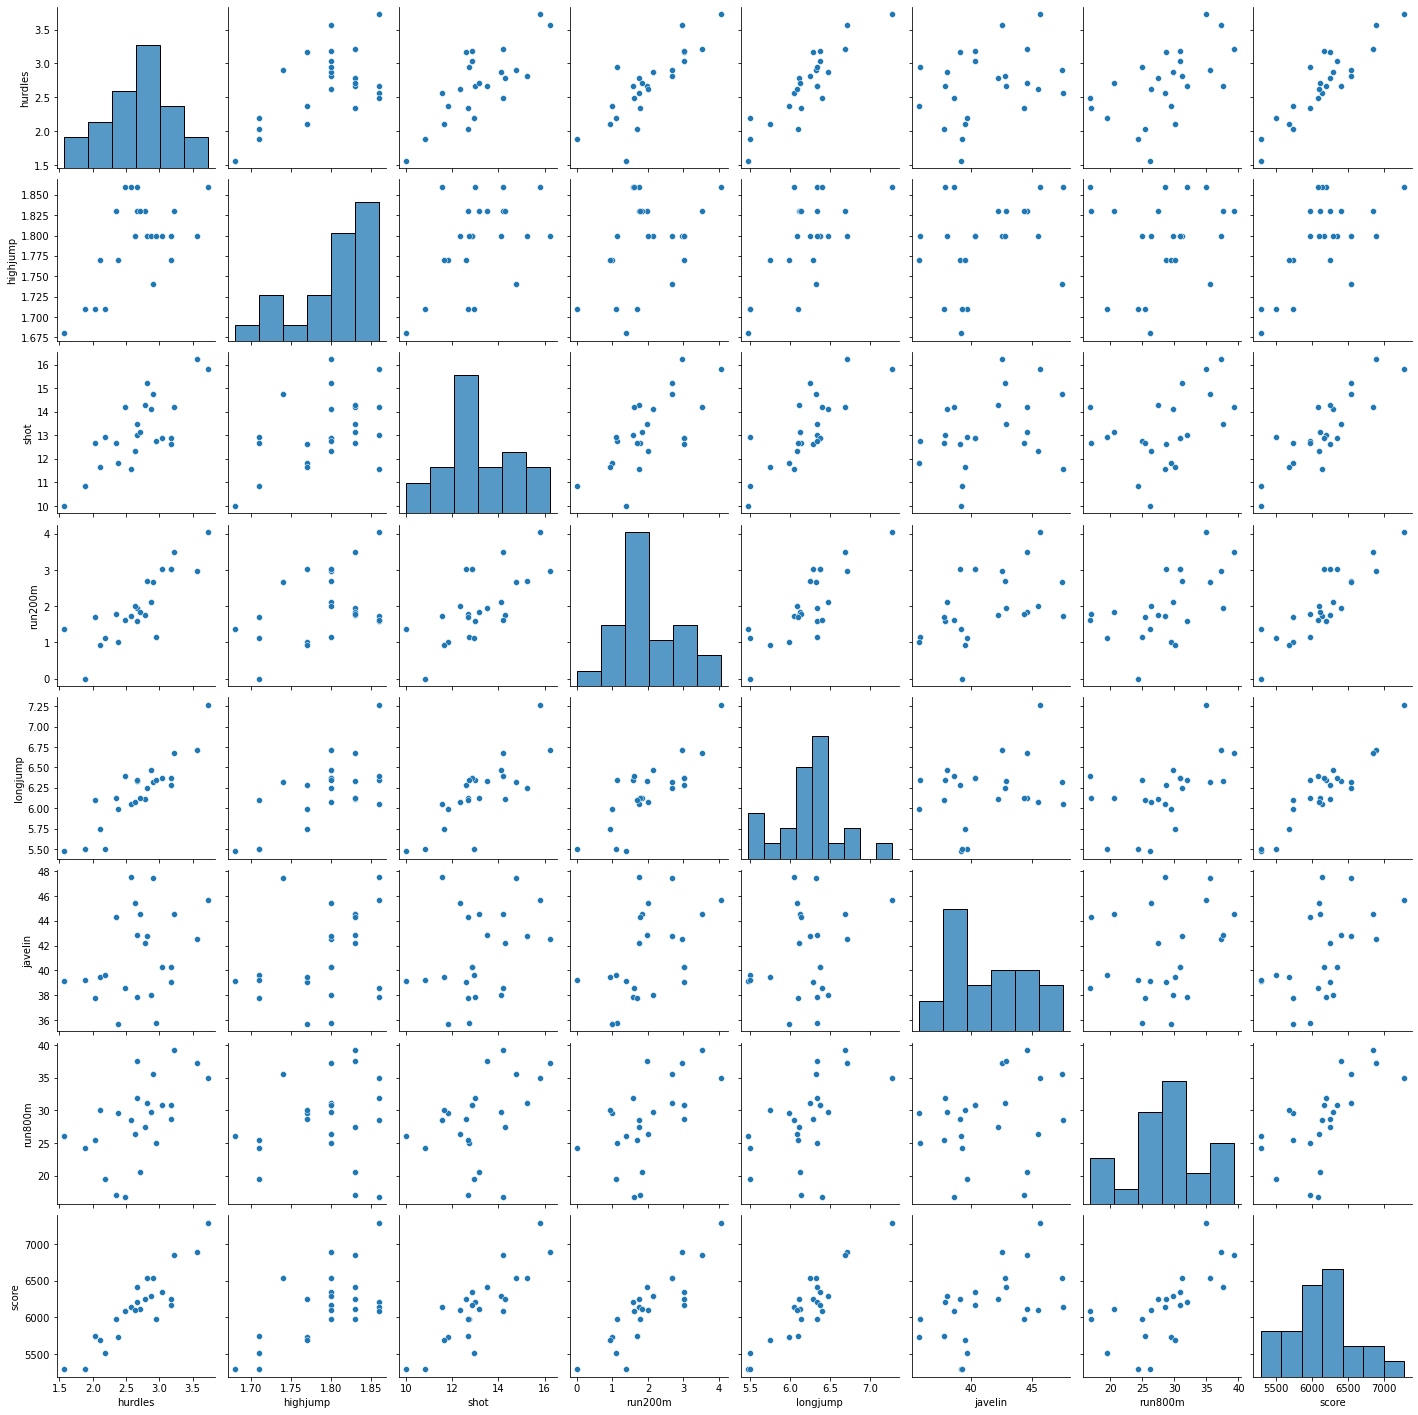

In [9]:
sns.pairplot(heptathlon2)
plt.show()

- 주성분 분석 진행

In [10]:
heptathlon2.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),3.73,1.86,15.80,4.05,7.27,45.66,34.92,7291
John (GDR),3.57,1.80,16.23,2.96,6.71,42.56,37.31,6897
Behmer (GDR),3.22,1.83,14.20,3.51,6.68,44.54,39.23,6858
Sablovskaite (URS),2.81,1.80,15.23,2.69,6.25,42.78,31.19,6540
Choubenkova (URS),2.91,1.74,14.76,2.68,6.32,47.46,35.53,6540


In [11]:
# Score를 제외한 앞의 7개 변수만 갖고 진행
X = heptathlon2.iloc[:,:-1]

In [12]:
X.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
Joyner-Kersee (USA),3.73,1.86,15.80,4.05,7.27,45.66,34.92
John (GDR),3.57,1.80,16.23,2.96,6.71,42.56,37.31
Behmer (GDR),3.22,1.83,14.20,3.51,6.68,44.54,39.23
Sablovskaite (URS),2.81,1.80,15.23,2.69,6.25,42.78,31.19
Choubenkova (URS),2.91,1.74,14.76,2.68,6.32,47.46,35.53


In [13]:
# 변수 간 통계량의 차이가 크기 때문에 표준화를 진행
# 표준편차가 다를 때, covariance matrix를 통해 주성분분석을 진행하면 분산이 큰 쪽에 훨씬 영향을 많이 받게 됨
# 고유값이 큰 것을 남기게 되는 과정에서, 분산이 큰 변수의 영향력이 적은 것보다 훨씬 커짐
# 이 상황이 바람직하다면, 공분산행렬을 그대로 사용해도 되지만 (예) 시험 점수 (변별력이 큰 과목의 영향력을 크게 유지하고 싶을 때)
# 아래 상황은 종목의 차이에 의해 기록 단위가 달라 차이가 발생하는 것이므로 표준화 하는 것이 바람직함
X.describe()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
count,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000
mean,2.687500,1.793750,13.173333,2.02375,6.205417,41.278333,28.516667
std,0.514564,0.052321,1.497150,0.93677,0.401659,3.468707,6.147248
min,1.570000,1.680000,10.000000,0.00000,5.470000,35.680000,16.760000
25%,2.372500,1.770000,12.545000,1.53000,6.072500,38.945000,25.295000
50%,2.690000,1.800000,12.915000,1.80500,6.265000,40.280000,29.110000
75%,2.972500,1.830000,14.202500,2.75750,6.370000,44.390000,31.377500
max,3.730000,1.860000,16.230000,4.05000,7.270000,47.500000,39.230000


In [14]:
# 표준화
X_scale = StandardScaler().fit_transform(X)
X_scale

array([[ 2.06956174,  1.29345261,  1.79217892,  2.2095401 ,  2.70746878,
         1.29036756,  1.06406235],
       [ 1.75193116,  0.12202383,  2.08556862,  1.02094111,  1.28326602,
         0.3774411 ,  1.46121629],
       [ 1.05711427,  0.70773822,  0.70049633,  1.6206929 ,  1.20696945,
         0.96053606,  1.78026882],
       [ 0.24318591,  0.12202383,  1.403267  ,  0.7265175 ,  0.11338519,
         0.44222943,  0.44423634],
       [ 0.44170502, -1.04940495,  1.08258524,  0.71561293,  0.29141053,
         1.82045388,  1.165428  ],
       [-0.03474084,  0.70773822,  0.2228852 , -0.06951668,  0.31684273,
         0.45400912,  1.51605344],
       [ 0.69977987,  0.12202383, -0.20014181,  1.08636858,  0.41857149,
        -0.29400158,  0.39438438],
       [ 0.36229738,  0.12202383,  0.65273522,  0.11586114,  0.67289341,
        -0.96544427,  0.20993214],
       [ 0.20348209,  0.70773822,  0.75508046, -0.29851282, -0.2426655 ,
         0.27142383, -0.18888353],
       [ 0.95785471, -0.4636

In [15]:
# 표준화된 변수를 PCA에 fit
# pca 안에 여러 가지 값이 포함됨
pca=PCA().fit(X_scale)

In [16]:
# 전체 변수 중 하나만 사용하더라도 61.7% 설명 가능
pca.explained_variance_ratio_  #lambda / p , 현 데이터에선 lambda / 7

array([0.61766317, 0.12842778, 0.11853453, 0.06667967, 0.04261745,
       0.01626797, 0.00980943])

In [17]:
np.cumsum(pca.explained_variance_ratio_) # 누적 분산 설명 비율

array([0.61766317, 0.74609094, 0.86462548, 0.93130515, 0.9739226 ,
       0.99019057, 1.        ])

In [18]:
pca.explained_variance_ # lambda

array([4.51162661, 0.93808116, 0.86581744, 0.4870515 , 0.31129271,
       0.1188269 , 0.0716515 ])

1차원으로 축소: 62%   
2차원으로 축소: PC1+PC2, 75%   
3차원으로 축소: 86%

- Scree plot

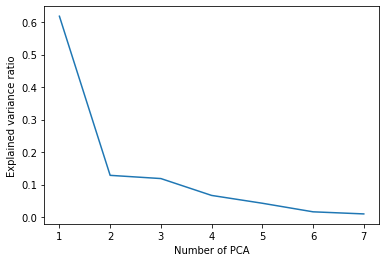

In [19]:
plt.plot(np.arange(1,X_scale.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

- 7개 변수를 2개 주성분점수로 축약할 때 총분산의 74.6% 설명가능
- 팔꿈치 역시 주성분 개수 2일 때 존재 

#### PC scores
- 변환된 주성분 $y_1, \ldots, y_p$ 값 

In [20]:
# 변환된 주성분 값 추출
# 원변수(x)들의 선형결합으로 만들어짐
x_reduced = pca.transform(X_scale)

In [21]:
# X_scale = 원변수, X_reduced = y1, ..., yp
# 원변수에 weight를 곱해서 sum한 것이 y
x_reduced.shape, X_scale.shape

((24, 7), (24, 7))

Example) 1st PC: $y_1 = \mathbf a_1'\mathbf x = a_{11}x_1 +a_{21}x_2 + \cdots + a_{p1} x_p$

In [22]:
# 7개의 원변수에 대한 7개의 weight 값이 7개의 PC에 대해 들어간 것
pca.components_.shape

(7, 7)

In [23]:
# 1st PC에 대한 Weight
# lambda 1 에 해당하는 고유 벡터 e1
pca.components_[0]  # loadings: a_i1

array([0.45038762, 0.31451151, 0.40248839, 0.42708602, 0.4509639 ,
       0.24230795, 0.30290682])

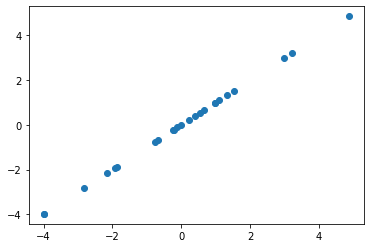

In [24]:
plt.scatter(np.matmul(X_scale, pca.components_[0]), x_reduced[:,0])
# 앞의 두 변수로 원변수의 선형결합, 세 번째 변수는 PCA를 통해 계산한 PC1 값
plt.show()
# 같은 값을 갖고 있음

- 표준점수 시스템에 의한 점수와 첫번째 주성분점수와의 상관계수는 0.99

In [25]:
np.corrcoef(heptathlon2.score,x_reduced[:,0] )

array([[1.        , 0.99311684],
       [0.99311684, 1.        ]])

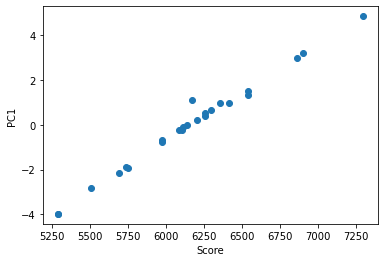

In [26]:
plt.scatter(heptathlon2.score,x_reduced[:,0])
plt.xlabel('Score')
plt.ylabel('PC1')
plt.show()

#### 행렬도(Biplot)
- 원변수와 주성분 점수와의 관계를 2차원 그래프로 표현하여 각 주성분의 의미와 관측치의 특성을 주성분 차원에서 탐색
- PC1과 PC2의 score 간의 산점도
- 화살표의 의미
    - 원변수와 PC간의 상관계수를 표현
    - PC와 평행할 수록 해당 PC에 큰 영향
    - 벡터의 길이가 원변수의 분산을 표현

In [27]:
# R에서는 Biplot을 손쉽게 그릴 수 있지만, Python 에서는 자동으로 그려주는 function이 없기 때문에 사용자 정의 함수 사용
def biplot(score,coeff, labels=None, index = X.index):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

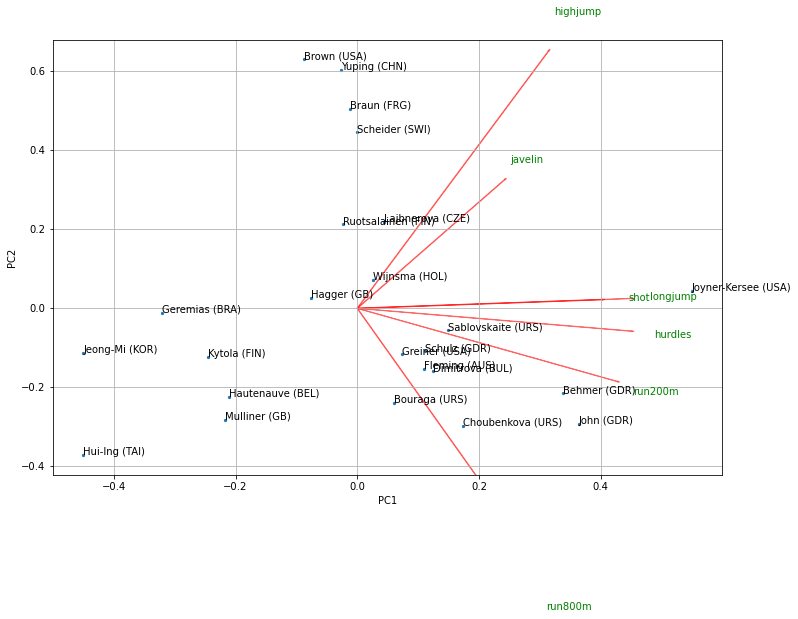

In [28]:
plt.figure(figsize=(12,8))
biplot(x_reduced[:,0:2],np.transpose(pca.components_[0:2, :]), X.columns )

- Joyner-Kersee는 hurdle, longjump, shot, run200에서 좋은 성적을 거둠
- run200m, hurdles, longjump, shot은 상관관계가 높음
- javeli과 highjump는 상관관계가 높음
- run800m은 다른 종목들과 비교적 상관관계가 적음
- PC1은 경쟁자들의 전체적인 점수에 의해서 분리
- PC2는 선수들이 각자 잘한 종목을 구분

In [29]:
# 각각의 포인트들이 원래 관측치를 나타내며, 직선이 원래의 변수를 나타냄
# 기본적으로 PC1과 PC2 사이의 산점도
# 원데이터 상에서는 correlation이 높아 보였지만, PC1과 PC2의 관계에선 correlation이 없어보임
# 직선 : 원변수와 PC 간의 상관계수를 표현, PC와 평행할수록 해당 PC에 큰 영향, 벡터의 길이가 원변수의 분산을 표현
# (예) shot과 long jump는 PC1과 각도가 상당히 유사 = correlation이 큼 (PC1을 만드는데 shot과 long jump가 큰 영향을 함) <-> highjump는 반대
#      high jump는 PC2에 영향을 많이 줌
#      원점을 기준으로 오른쪽으로 뻗어있다는 것은 PC1이 클수록, 변수들의 값도 크다는 것 (양의 상관관계) => 잘하는 사람이 PC1 값이 큼
#      만약의 반대로 뻗어있다면, correlation이 크더라도, PC1이 클수록, 변수들의 값이 작아짐 (음의 상관관계)
#      joyner-Kersee라는 선수의 점에서 원변수에 수직으로 내리면, 해당 포인트가 선수가 해당 변수에서 갖고 있는 상대적인 위치를 나타냄
#      원변수 간의 각도가 작으면 correlation이 높고, 각도가 크면 correlation이 작음
# 벡터의 길이는 원변수의 분산을 표현하므로, 표준화시켰을 때, 분산의 길이가 같아야 하지만 다르게 표현되는 이유:
# PC1과 PC2의 축으로 표현되어서, 7차원 공간으로 표현한다면 길이가 똑같음

#### Face data 사진압축 예시
- 100개의 사진과 얼굴의 각 부위의 특징을 포함하고 있는 데이터
- 이미지의 픽셀 값(96*96)을 벡터로 변환하여 저장 

In [30]:
face = pd.read_csv(data_path + 'face100.csv')
im_train = face.Image

In [31]:
# 하나의 row가 하나의 사진
# 각 변수들의 좌표가 입력되어 있고, 마지막 변수에 실제 이미지에 대한 벡터값만을 사용
face.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [32]:
face.shape

(100, 31)

In [33]:
im_train2 = np.zeros((face.shape[0], 9216))
# 데이터의 행의 개수를, 96*96만큼의 열을 0으로 채워줌 
for j in range(face.shape[0]):
    im_train2[j,:]=np.array([int(i) for i in im_train[j].split()])
# 각각의 값을 공백을 기준으로 나눠서 int값으로 바꿔서 넣어줌
# 원래는 96*96 값이 하나의 벡터로 문자열로 저장되어 잇음

In [34]:
# 하나의 사진
im_train[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

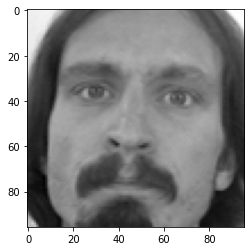

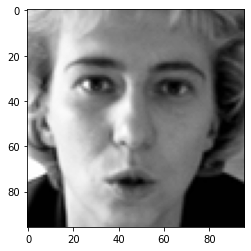

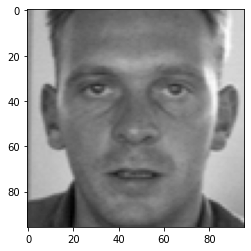

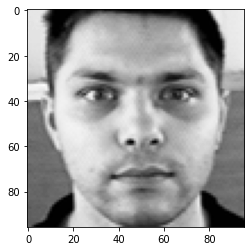

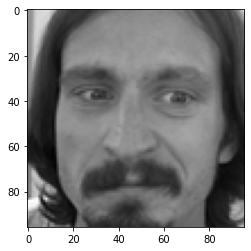

In [35]:
# 각각의 숫자를 96*96의 정사각형 사진형태로 변환
for i in range(5):
    plt.figure(i)
    plt.imshow(im_train2[i,:].reshape(96, 96), cmap="gray")

- 100*9216 크기의 데이터에 PCA를 적용 

In [36]:
face_scaler = StandardScaler().fit(im_train2)
# 데이터를 train
im_train2_scale = face_scaler.transform(im_train2)
# train 된 데이터를 transform
# PCA를 한 뒤, Scaler를 통해 backtransform 하기 위해 fit_transform하지 않고 나눠줌

# m=100, n=9216 -> Dimension 이 훨씬 큰 경우

In [37]:
im_train2_scale.shape

(100, 9216)

In [38]:
pca_face = PCA(n_components=0.9).fit(im_train2_scale) 
# n_components: 우리가 몇 개의 Dimension을 남길 것인가? 아무것도 넣지 않으면 9216개의 차원 전부가 PCA에 남게 됨
# 갯수를 넣어도 되고 실수를 넣어도 됨
np.cumsum(pca_face.explained_variance_ratio_)

array([0.48466357, 0.5929637 , 0.64782934, 0.68572173, 0.71351795,
       0.73731138, 0.75656734, 0.77384997, 0.78879148, 0.80127075,
       0.81280618, 0.82257629, 0.8313898 , 0.83912777, 0.84638669,
       0.85298226, 0.85926315, 0.865202  , 0.87059593, 0.87563313,
       0.88058191, 0.88511357, 0.88948354, 0.89364895, 0.89766825,
       0.9014451 ])

In [39]:
# 전체(100개)를 쓰지 않아도 26개만 활용하여 90% 이상 설명 가능
pca_face.explained_variance_ratio_.shape

(26,)

- 분산의 90%를 설명하는 최소 PC를 사용하여 데이터 축소

In [40]:
X_reduced = pca_face.transform(im_train2_scale)
X_reduced.shape # 9216->26 축소
# Y의 공간 (X들의 선형결합으로 생겨난 새로운 Y)

(100, 26)

- 축소된 PC를 사용하여 원래 데이터의 공간으로 재변환

In [41]:
X_reconstr = pca_face.inverse_transform(X_reduced)
X_reconstr.shape

(100, 9216)

In [42]:
im_train2_reconstr = face_scaler.inverse_transform(X_reconstr)

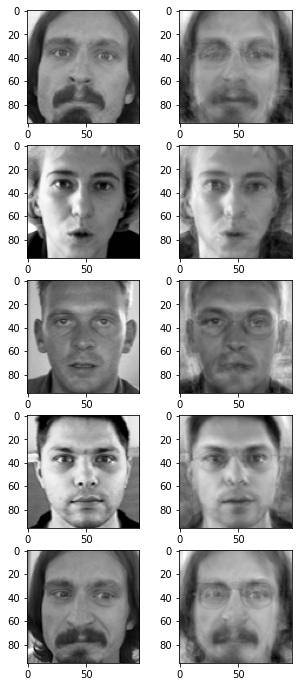

In [43]:
plt.figure(figsize=(5,12))
for i in np.arange(0,5):
    plt.subplot(5,2,2*i+1)
    plt.imshow(im_train2[i,:].reshape(96, 96), cmap="gray")
    plt.subplot(5,2,2*(i+1))
    plt.imshow(im_train2_reconstr[i,:].reshape(96, 96), cmap="gray")

#### 주성분 분석 실습문제

`Bulls.csv` 는 경매시장에서 거래된 76마리의 어린(2살 이하) 황소의 특성과 거래가격(SalePr)에 관한 자료이다. 변수 설명은 아래와 같다.
-	Breed=1 if Angus, 5 if Hereford, 8 if Simental
-	FtFrBody=fat free body (pounds)
-	Frame=Scale from 1(small) to 8 (large)
-	SaleHt=Sale height at shoulder (inches)
-	YrHgt=Yearling height at shoulder (inches)
-	PrctFFB=Percent fat-free body
-	BkFat=Back fat (inches)
-	SaleWt=Sale weight (pounds)

SalePr와 Breed 변수를 제외한 7개의 변수의 상관계수 행렬을 사용하여 주성분분석을 시행하고 아래의 질문에 답하시오. 

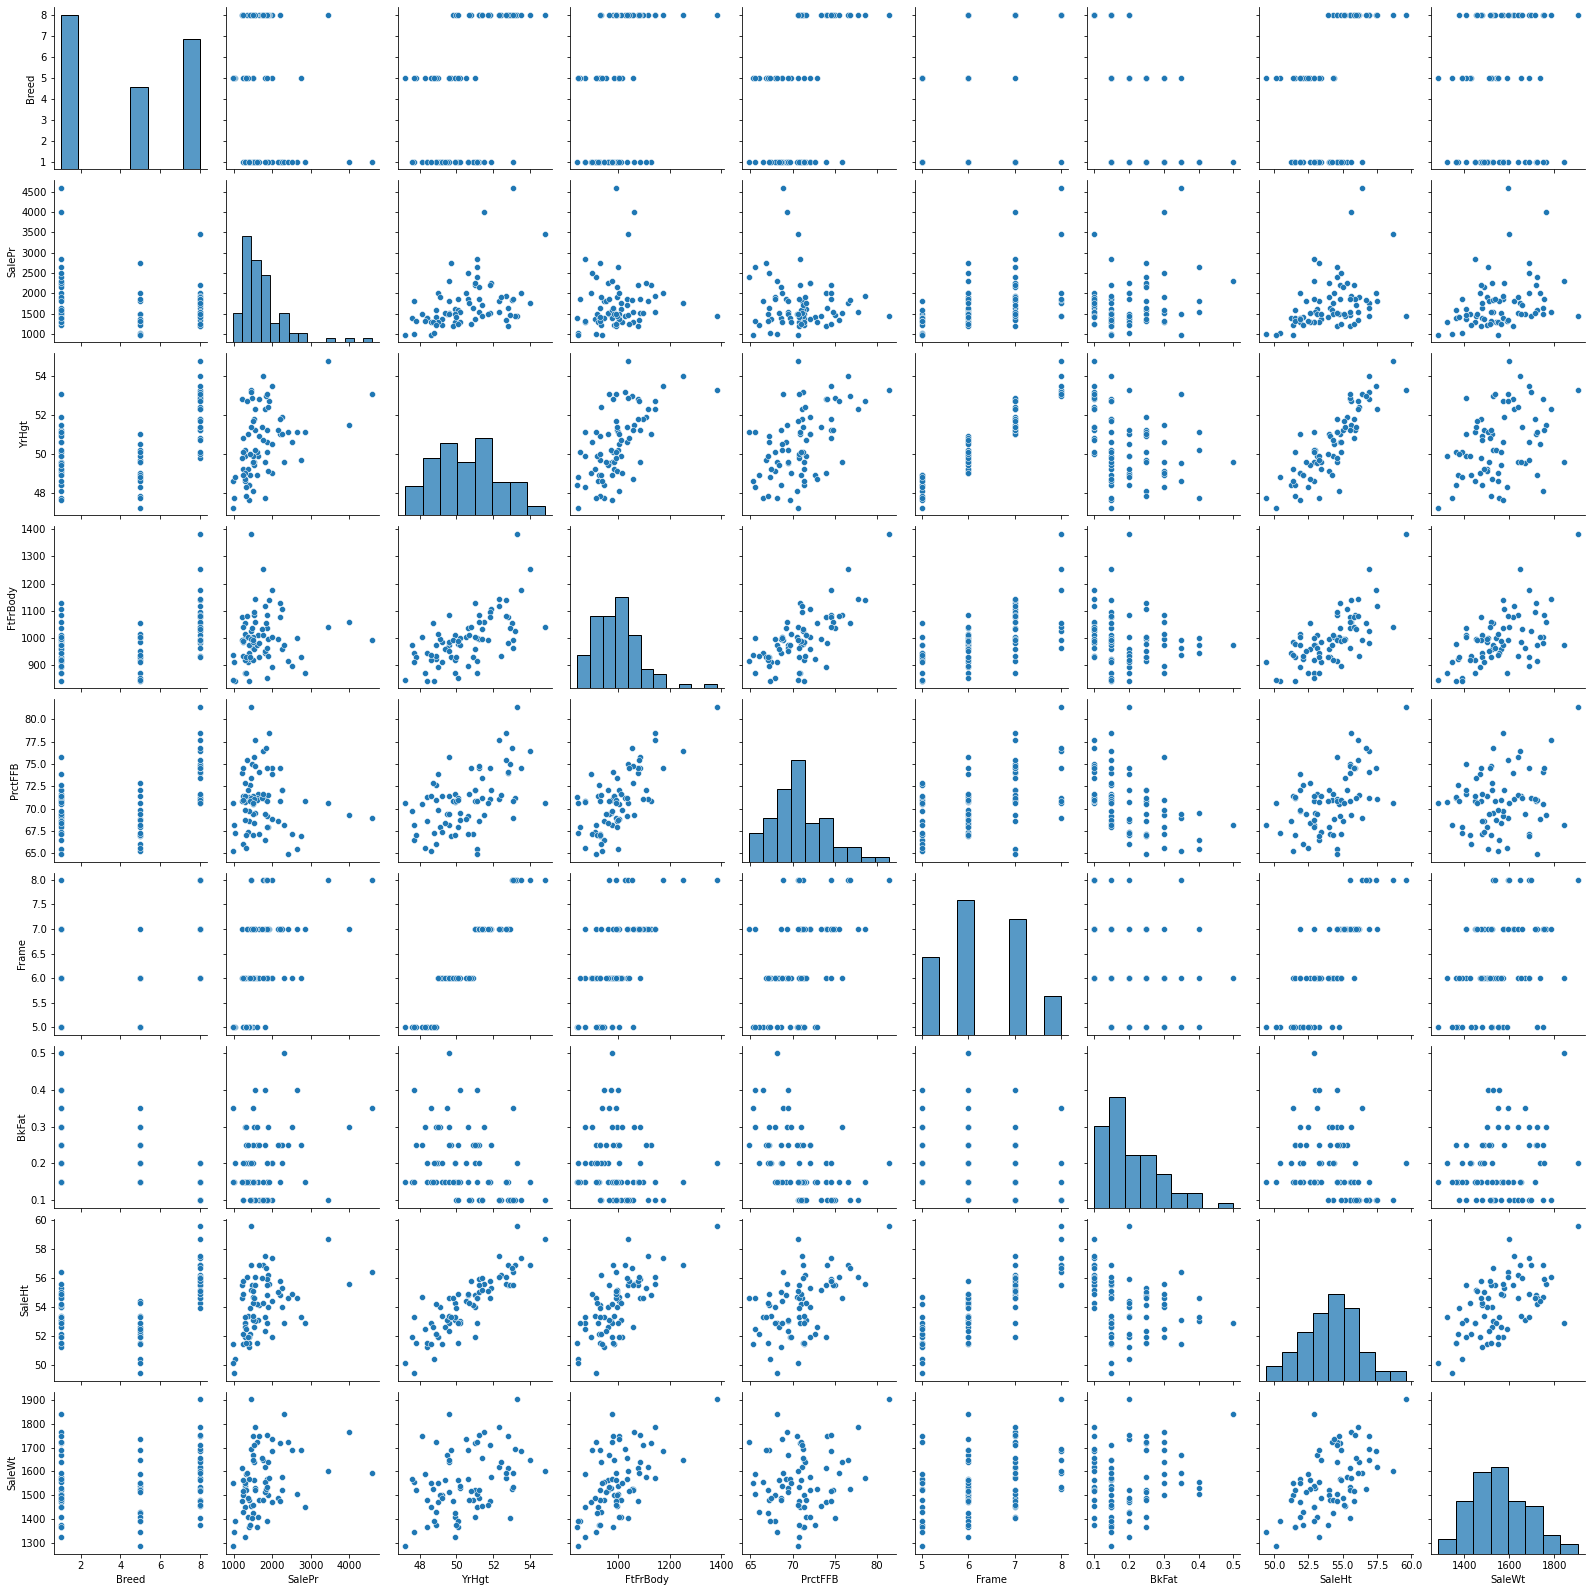

In [44]:
data = pd.read_csv(data_path + 'bulls.csv')
sns.pairplot(data)
plt.show()

1. 각 주성분의 분산을 사용하여 scree plot을 그리고 누적분산 설명비율을 계산하시오. 적절한 주성분의 개수는 무엇인가? 

In [45]:
# 종과 판매값에 대한 변수를 제거
# 소의 몸에 대한 측도만 남겨서 분석
X = data.iloc[:,2:]
X.head()

,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
0,51.0,1128,70.9,7,0.25,54.8,1720
1,51.9,1108,72.1,7,0.25,55.3,1575
2,49.9,1011,71.6,6,0.15,53.1,1410
3,53.1,993,68.9,8,0.35,56.4,1595
4,51.2,996,68.6,7,0.25,55.0,1488


In [46]:
X_scale = StandardScaler().fit_transform(X)

In [47]:
X_scale.shape

(76, 7)

In [48]:
pca = PCA().fit(X_scale)
pca.explained_variance_ratio_ # 각 주성분이 설명해주는 변동의 비율

array([0.58867113, 0.19101847, 0.10591179, 0.0602036 , 0.0265437 ,
       0.02092891, 0.00672239])

In [49]:
np.cumsum(pca.explained_variance_ratio_) # 누적비율

array([0.58867113, 0.7796896 , 0.8856014 , 0.945805  , 0.9723487 ,
       0.99327761, 1.        ])

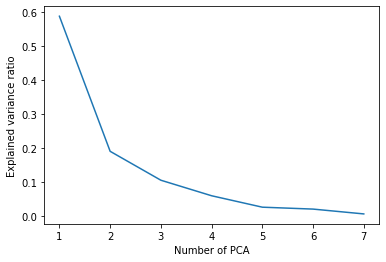

In [50]:
plt.plot(np.arange(1,X_scale.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

In [51]:
# 평균 분산(1)보다 작은 것을 버리고 큰 것만 취한다면, PC를 2개 활용하게 됨
pca.explained_variance_ # lambda

array([4.17564057, 1.35495769, 0.75126765, 0.42704422, 0.18828334,
       0.14845573, 0.04768413])

2.	첫 두 개의 주성분을 계산하는데 사용된 rotation값을 찾으시오.

In [52]:
pca.components_[0] # 첫 번째 주성분의 weights

array([ 0.44993132,  0.41232559,  0.35556181,  0.4339569 , -0.1867048 ,
        0.45285382,  0.26994696])

In [53]:
pca.components_[1] # 두 번째 주성분

array([-0.04279022,  0.12983655, -0.31550779,  0.00772821,  0.71471936,
        0.10131509,  0.60051483])

3.	각 주성분의 rotation값을 barplot을 사용해 비교하고 주성분의 의미를 해석하시오.

In [54]:
data.columns[2:] # 원 변수의 이름

Index(['YrHgt', 'FtFrBody', 'PrctFFB', 'Frame', 'BkFat', 'SaleHt', 'SaleWt'], dtype='object')

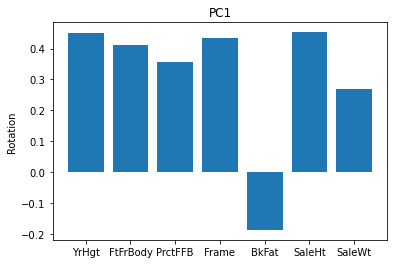

In [55]:
# PC1을 만드는데 어떤 변수들이 가중치를 가졌는가?
# BkFat은 음의 영향
plt.bar(x=data.columns[2:], height=pca.components_[0])
plt.title('PC1')
plt.ylabel('Rotation')
plt.show() 

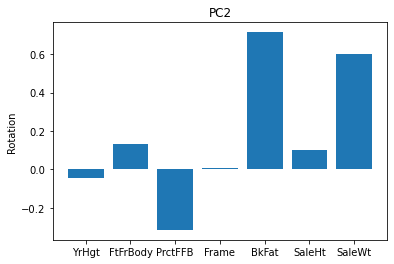

In [56]:
# BkFat과 SaleWt가 가장 크게 영향
# 작은 네 변수는 거의 영향을 주지 못함 (weight가 작음)
plt.bar(x=data.columns[2:], height=pca.components_[1])
plt.title('PC2')
plt.ylabel('Rotation')
plt.show() 

4.	행렬도를 사용해 원변수와 주성분의 관계, 원변수 간의 상관관계, 특이한 관측치의 존재 유무 등을 파악하고 설명하시오.

In [57]:
# PC1부터 PC7까지의 값
x_reduced = pca.transform(X_scale)

In [59]:
def biplot(score,coeff, labels=None, index = X.index):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

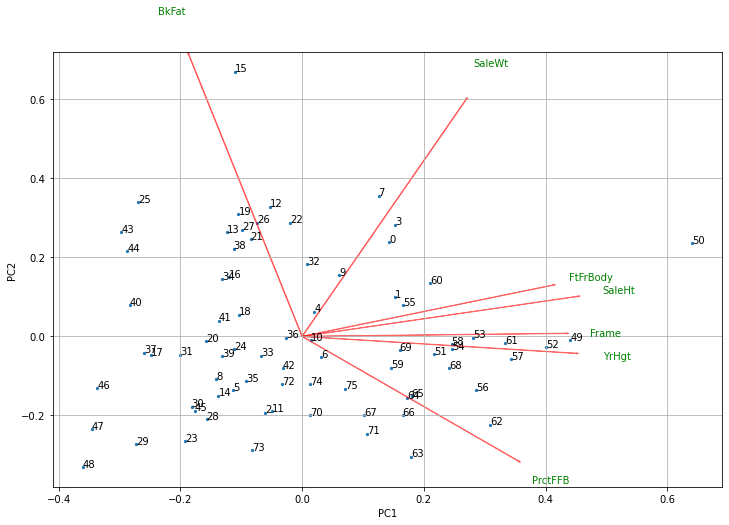

In [60]:
# 2개의 PC만을 갖고 biplot을 그림
# index = 각 소의 번호
# PC2 에서 BkFat, SaleWt이 양의 방향으로 높으면서 각도가 적다(corr 큼), PrctFFB는 음의 방향으로 높으며, 나머지 4개의 변수는 PC2와 수직이므로 corr이 작다
# 특이한 관측치 : 50, 15 -> 50은 다른 소에 비해 큰 값을 가짐 (BkFat 제외), 15는 Bkfat은 높고 다른 값은 작은 소
plt.figure(figsize=(12,8))
biplot(x_reduced[:,0:2],np.transpose(pca.components_[0:2, :]), X.columns)

5.	첫 두 개의 주성분을 사용해 산점도를 그리고 Breed를 서로 다른 색깔과 기호로 표시하시오. 주성분에 의해 다른 종의 황소를 구분할 수 있는가? 이상점이 있는가? 있다면 어떤 특성을 가진 소인가?

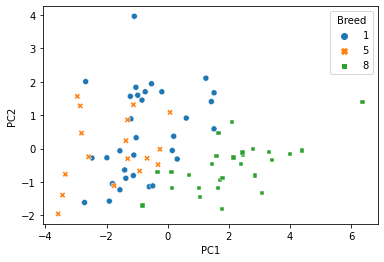

In [61]:
# data.Breed가 수치형이기 때문에 색이 애매, 범주형으로 바꿔주면 깔끔해짐
sns.scatterplot(x=x_reduced[:,0], y=x_reduced[:,1], hue = data.Breed.astype('category'), style = data.Breed) # x=PC1, y=PC2
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 요인 분석

#### 요인 분석 실습문제